The desired output is 0.5.
The output of the model is 0.5003159203288151.


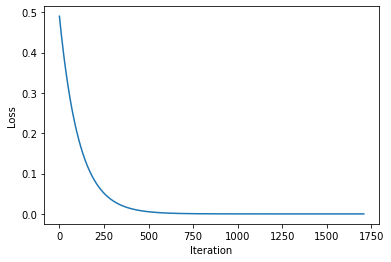

In [18]:
import matplotlib.pyplot as plt

i,w = 1.5,0.8
y = 0.5
loss = (i * w - y) ** 2
lr = 0.001
losses = [loss]

while loss > 1e-7:
    g = 2 * (i * w - y) * i #计算w的梯度
    w = w - lr * g #进行梯度下降
    loss = (i * w - y) ** 2 #计算损失函数
    losses.append(loss)

print('The desired output is {}.\nThe output of the model is {}.'.format(y,i * w))
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.plot(losses) #可视化梯度下降过程 
plt.show()

In [544]:
import numpy as np

class Linear:
    def __init__(self,in_dim,out_dim):
        self.out_dim = out_dim
        self.w = np.random.randn(in_dim,out_dim) * 0.1
        self.b = np.random.randn(1,out_dim) * 0.1
        
    def forward(self,x):
        self.cache = np.array(x)
        return np.dot(x,self.w) + self.b
    
    def backward(self,g):
        x = self.cache
        self.g_w = np.dot(x.T,g)
        self.g_b = g
        return np.dot(g,self.w.T)
    
    def optimize(self,lr):
        self.w = self.w - lr * self.g_w
        self.b = self.b - lr * self.g_b

class Sigmoid:
    def __init__(self):
        pass
    
    def __s(self,x):
        return 1 / (1 + np.exp(-x))
    
    def forward(self,x):
        self.cache = np.array(x)
        return self.__s(x)
    
    def backward(self,g):
        x = self.cache
        return g * self.__s(x) * (1 - self.__s(x))
    
    def optimize(self,lr):
        return None
    
class MSELoss:
    def __init__(self):
        pass
    
    def forward(self,pred,y):
        self.cache = (np.array(pred),np.array(y))
        return (y - pred) ** 2
    
    def backward(self):
        pred,y = self.cache[0],self.cache[1]
        return -2 * (y - pred)

class Sequential:
    def __init__(self,*models):
        self.models = models
    
    def forward(self,x):
        x0 = x
        for m in self.models:
            x0 = m.forward(x0)
        return x0
    
    def backward(self,loss_g):
        g = loss_g
        for i in range(len(self.models) - 1,-1,-1):
            g = self.models[i].backward(g)
            
    def optimize(self,lr):
        for m in self.models:
            m.optimize(lr)

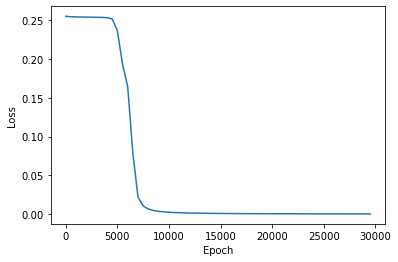

In [556]:
import matplotlib.pyplot as plt

model = Sequential(Linear(2,2),Sigmoid(),Linear(2,1),Sigmoid())
criterion = MSELoss()
X = [np.array([[0,0]]),np.array([[0,1]]),np.array([[1,0]]),np.array([[1,1]])]
Y = [0,1,1,0]

n_epochs = 30000
milestones = range(0,n_epochs,500)
losses = []
for epoch in range(n_epochs):
    loss = []
    for i in range(len(X)):
        x,y = X[i],Y[i]
        pred = model.forward(x)
        loss.append(criterion.forward(pred,y))
        loss_g = criterion.backward()
        model.backward(loss_g)
        model.optimize(1e-1)
        
    if epoch in milestones:
        losses.append(np.mean(np.array(loss)))

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.plot(milestones,losses) #可视化梯度下降过程 
plt.show()

In [557]:
#展示异或问题的结果
model.forward(np.array([[0,0],[0,1],[1,0],[1,1]]))

array([[0.01538872],
       [0.98375523],
       [0.98373989],
       [0.02008491]])